In [1]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [6]:
train = pd.read_excel('ptrain.xlsx')
test = pd.read_excel('ptest.xlsx')
train


,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),pressure_msl (hPa),...,wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),Date
0,10.450000,79.208333,6.637500,9.000000,0.000000,0.000000,0.0,0,0.000000,1018.208333,...,12.620833,11.191667,11.887500,14.245833,18.400000,0.141292,0.182375,0.246333,0.368417,2000-01-01
1,11.100000,80.666667,7.554167,9.833333,0.000000,0.000000,0.0,0,0.000000,1017.800000,...,13.245833,11.758333,12.170833,14.200000,18.304167,0.140333,0.182083,0.246000,0.368000,2000-01-02
2,11.279167,79.958333,7.608333,10.029167,0.000000,0.000000,0.0,0,0.000000,1015.679167,...,13.220833,12.025000,12.504167,14.200000,18.229167,0.139542,0.181583,0.245375,0.368000,2000-01-03
3,11.262500,80.083333,7.650000,10.095833,0.000000,0.000000,0.0,0,0.000000,1016.341667,...,11.625000,11.879167,12.495833,14.200000,18.154167,0.139292,0.181250,0.245000,0.367042,2000-01-04
4,10.591667,82.708333,7.533333,9.312500,0.000000,0.000000,0.0,0,0.125000,1016.800000,...,13.470833,11.595833,12.375000,14.200000,18.083333,0.139000,0.181000,0.245000,0.367000,2000-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,12.233333,60.333333,4.229167,10.129167,0.000000,0.000000,0.0,0,1.208333,1011.487500,...,13.566667,13.191667,14.041667,14.800000,15.900000,0.322167,0.342417,0.283833,0.353000,2019-02-25
6996,12.379167,68.458333,6.291667,10.533333,0.191667,0.191667,0.0,0,14.791667,1011.591667,...,19.270833,13.495833,13.783333,14.712500,15.900000,0.320083,0.333542,0.282583,0.353000,2019-02-26
6997,8.500000,82.750000,5.625000,6.550000,0.404167,0.404167,0.0,0,25.500000,1012.695833,...,15.437500,11.441667,13.004167,14.629167,15.900000,0.397917,0.354792,0.282583,0.353000,2019-02-27
6998,9.654167,73.083333,4.666667,7.708333,0.000000,0.000000,0.0,0,0.125000,1015.016667,...,14.300000,11.466667,12.162500,14.366667,15.808333,0.364375,0.364958,0.285083,0.353000,2019-02-28


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   temperature_2m (°C)                 7000 non-null   float64       
 1   relative_humidity_2m (%)            7000 non-null   float64       
 2   dew_point_2m (°C)                   7000 non-null   float64       
 3   apparent_temperature (°C)           7000 non-null   float64       
 4   precipitation (mm)                  7000 non-null   float64       
 5   rain (mm)                           7000 non-null   float64       
 6   snowfall (cm)                       7000 non-null   float64       
 7   snow_depth (m)                      7000 non-null   int64         
 8   weather_code (wmo code)             7000 non-null   float64       
 9   pressure_msl (hPa)                  7000 non-null   float64       
 10  surface_pressure (hPa)  

In [9]:
data = train[['Date', 'temperature_2m (°C)']].rename(columns={'Date': 'ds', 'temperature_2m (°C)': 'y'})
data

,ds,y
0,2000-01-01,10.450000
1,2000-01-02,11.100000
2,2000-01-03,11.279167
3,2000-01-04,11.262500
4,2000-01-05,10.591667
...,...,...
6995,2019-02-25,12.233333
6996,2019-02-26,12.379167
6997,2019-02-27,8.500000
6998,2019-02-28,9.654167


In [12]:
model = NeuralProphet()
# model.fit(data)
model.fit(data, freq='D')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.986% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\neuralprop

Finding best initial lr:   0%|          | 0/246 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,32.317413,36.513268,1.018630,0.0,0
1,6.773631,8.791730,0.154222,0.0,1
2,1.649179,2.101331,0.010229,0.0,2
3,1.379482,1.796394,0.007736,0.0,3
4,1.335570,1.756386,0.007528,0.0,4
5,1.322762,1.737038,0.007401,0.0,5
6,1.340985,1.756597,0.007636,0.0,6
7,1.391840,1.822843,0.008228,0.0,7
8,1.386836,1.811398,0.008096,0.0,8
9,1.406781,1.830570,0.008292,0.0,9


In [18]:
future = model.make_future_dataframe(data, periods=10)  # Adjust 'periods' based on your prediction horizon

WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.986% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as 

In [19]:
forecast = model.predict(future)
forecast

WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 90.0% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an

Predicting: 110it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2019-03-02,None,16.556709,21.519947,-4.934329,-0.028907
1,2019-03-03,None,16.826204,21.520828,-4.762500,0.067878
2,2019-03-04,None,17.051418,21.521709,-4.586905,0.116614
3,2019-03-05,None,17.224979,21.522591,-4.406933,0.109320
4,2019-03-06,None,17.184956,21.523474,-4.222997,-0.115521
5,2019-03-07,None,17.397758,21.524357,-4.035244,-0.091355
6,2019-03-08,None,17.623104,21.525238,-3.844178,-0.057955
7,2019-03-09,None,17.847961,21.526119,-3.649286,-0.028874
8,2019-03-10,None,18.143728,21.527002,-3.451102,0.067828
9,2019-03-11,None,18.394234,21.527884,-3.250236,0.116586


<Axes: >

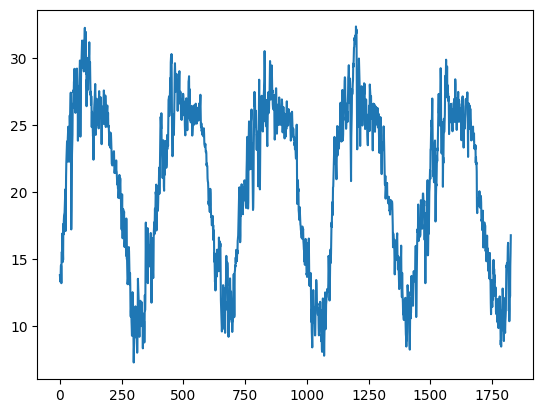

In [17]:
test['temperature_2m (°C)'].plot()